In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.io

In [4]:
mat=scipy.io.loadmat("C:/Users/91812/Downloads/wiki/wiki.mat")

In [5]:
wiki_data = mat['wiki']

In [6]:
# List all keys in the mat file to inspect the structure
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'wiki'])


In [7]:
print(wiki_data.dtype)

[('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O')]


In [8]:
print(wiki_data['full_path'])  # Check what this field contains
print(wiki_data['dob'])        # Check what this field contains
print(wiki_data['photo_taken'])  # Check what this field contains


[[array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
          array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
          array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
          array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
          array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
          array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
        dtype=object)                                                 ]]
[[array([[723671, 703186, 711677, ..., 720620, 723893, 713846]])]]
[[array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16)]]


In [9]:
import pandas as pd

# Extract the cleaned file paths
full_path = wiki_data['full_path'][0][0]  # Get the paths
cleaned_paths = [p[0] for p in full_path[0]]  # Clean up the extra list

# Extract dob and photo_taken
dob = wiki_data['dob'][0][0][0]  
photo_taken = wiki_data['photo_taken'][0][0][0] 

face_score = wiki_data['face_score'][0][0][0]
second_face_score = wiki_data['second_face_score'][0][0][0]


# Ensure the lists are the same length
# Ensure the lists are the same length
assert len(cleaned_paths) == len(dob) == len(photo_taken) == len(face_score) == len(second_face_score), "Lengths mismatch!"


data = pd.DataFrame({
    'path': cleaned_paths,
    'dob': dob,
    'photo_taken': photo_taken,
    'face_score': face_score,
    'second_face_score': second_face_score
})

# Calculate the age
data['age'] = data['photo_taken'] - (data['dob'] // 365.25)

# Display the DataFrame
print(data.head())

                              path     dob  photo_taken  face_score  \
0  17/10000217_1981-05-05_2009.jpg  723671         2009    4.300962   
1  48/10000548_1925-04-04_1964.jpg  703186         1964    2.645639   
2    12/100012_1948-07-03_2008.jpg  711677         2008    4.329329   
3  65/10001965_1930-05-23_1961.jpg  705061         1961        -inf   
4  16/10002116_1971-05-31_2012.jpg  720044         2012    3.408442   

   second_face_score   age  
0                NaN  28.0  
1           1.949248  39.0  
2                NaN  60.0  
3                NaN  31.0  
4                NaN  41.0  


In [10]:
data.head()

,path,dob,photo_taken,face_score,second_face_score,age
0,17/10000217_1981-05-05_2009.jpg,723671,2009,4.300962,NaN,28.0
1,48/10000548_1925-04-04_1964.jpg,703186,1964,2.645639,1.949248,39.0
2,12/100012_1948-07-03_2008.jpg,711677,2008,4.329329,NaN,60.0
3,65/10001965_1930-05-23_1961.jpg,705061,1961,-inf,NaN,31.0
4,16/10002116_1971-05-31_2012.jpg,720044,2012,3.408442,NaN,41.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   path               62328 non-null  object 
 1   dob                62328 non-null  int32  
 2   photo_taken        62328 non-null  uint16 
 3   face_score         62328 non-null  float64
 4   second_face_score  4096 non-null   float64
 5   age                62328 non-null  float64
dtypes: float64(3), int32(1), object(1), uint16(1)
memory usage: 2.3+ MB


In [12]:
data['second_face_score'].isna()

0         True
1        False
2         True
3         True
4         True
         ...  
62323     True
62324     True
62325     True
62326     True
62327     True
Name: second_face_score, Length: 62328, dtype: bool

In [13]:
import numpy as np

# Remove pictures without a face
data = data[data['face_score'] != -np.inf]

# Remove pictures with more than one face
data = data[data['second_face_score'].isna()]

# Keep ages between 1 and 100
data = data[(data['age'] > 0) & (data['age'] <= 100)]


In [14]:
print(data.shape)
print(data.describe())


(40156, 6)
                 dob   photo_taken    face_score  second_face_score  \
count   40156.000000  40156.000000  40156.000000                0.0   
mean   717151.446484   2001.442425      3.212448                NaN   
std      9226.533545     19.535482      1.259079                NaN   
min    677987.000000   1940.000000      0.731430                NaN   
25%    711047.500000   2006.000000      2.239617                NaN   
50%    719702.000000   2010.000000      3.233579                NaN   
75%    724792.250000   2012.000000      4.165457                NaN   
max    734922.000000   2015.000000      7.081268                NaN   

               age  
count  40156.00000  
mean      38.48451  
std       16.56664  
min        1.00000  
25%       26.00000  
50%       33.00000  
75%       49.00000  
max      100.00000  


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40156 entries, 0 to 62327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   path               40156 non-null  object 
 1   dob                40156 non-null  int32  
 2   photo_taken        40156 non-null  uint16 
 3   face_score         40156 non-null  float64
 4   second_face_score  0 non-null      float64
 5   age                40156 non-null  float64
dtypes: float64(3), int32(1), object(1), uint16(1)
memory usage: 1.8+ MB


In [16]:
data.isna().sum()

path                     0
dob                      0
photo_taken              0
face_score               0
second_face_score    40156
age                      0
dtype: int64

In [17]:
data.face_score.mean()

3.212448127819164

In [18]:
filtered_data = data[data['face_score'] >= 2.5]
print(f"Original dataset size: {len(data)}")
print(f"Filtered dataset size: {len(filtered_data)}")

Original dataset size: 40156
Filtered dataset size: 27672


<Axes: >

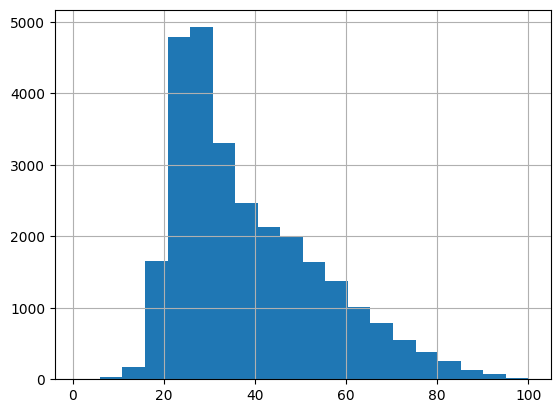

In [19]:
filtered_data['age'].hist(bins=20)

In [20]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27672 entries, 0 to 62327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   path               27672 non-null  object 
 1   dob                27672 non-null  int32  
 2   photo_taken        27672 non-null  uint16 
 3   face_score         27672 non-null  float64
 4   second_face_score  0 non-null      float64
 5   age                27672 non-null  float64
dtypes: float64(3), int32(1), object(1), uint16(1)
memory usage: 1.2+ MB


In [21]:
gender=wiki_data['gender'][0][0][0]

In [22]:
filtered_data['gender'] = pd.Series(gender).loc[filtered_data.index].values

C:\Users\91812\AppData\Local\Temp\ipykernel_10140\1693340998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['gender'] = pd.Series(gender).loc[filtered_data.index].values


In [23]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27672 entries, 0 to 62327
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   path               27672 non-null  object 
 1   dob                27672 non-null  int32  
 2   photo_taken        27672 non-null  uint16 
 3   face_score         27672 non-null  float64
 4   second_face_score  0 non-null      float64
 5   age                27672 non-null  float64
 6   gender             27139 non-null  float64
dtypes: float64(4), int32(1), object(1), uint16(1)
memory usage: 1.4+ MB


In [24]:
gender_counts=filtered_data['gender'].value_counts()

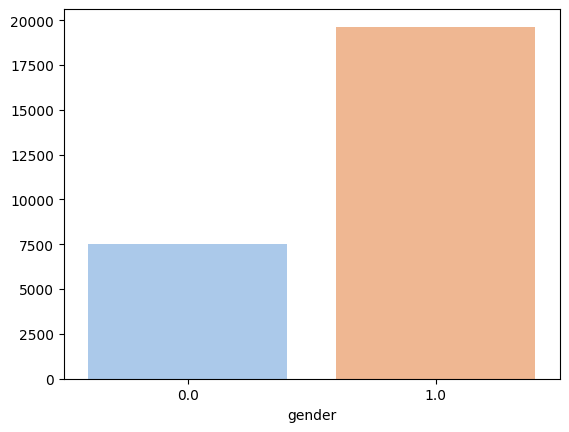

In [25]:
import seaborn as sns
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.show()

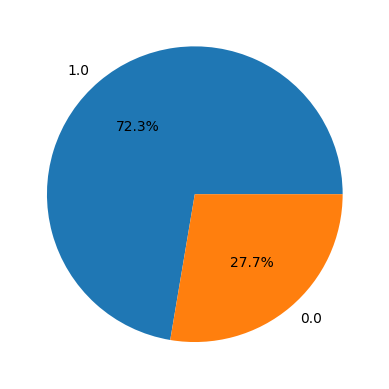

In [26]:
plt.pie(x=gender_counts.values,labels=gender_counts.index,autopct='%1.1f%%')
plt.show()

In [27]:
print(filtered_data.shape)


(27672, 7)


In [28]:
print(filtered_data.isnull().sum())


path                     0
dob                      0
photo_taken              0
face_score               0
second_face_score    27672
age                      0
gender                 533
dtype: int64


c:\Users\91812\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


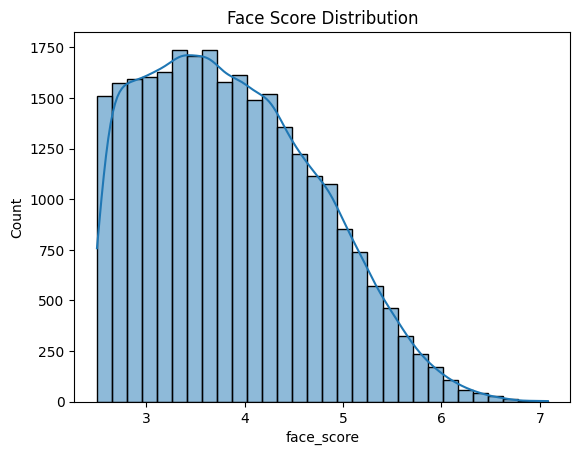

In [29]:
sns.histplot(filtered_data['face_score'], bins=30, kde=True)
plt.title('Face Score Distribution')
plt.show()


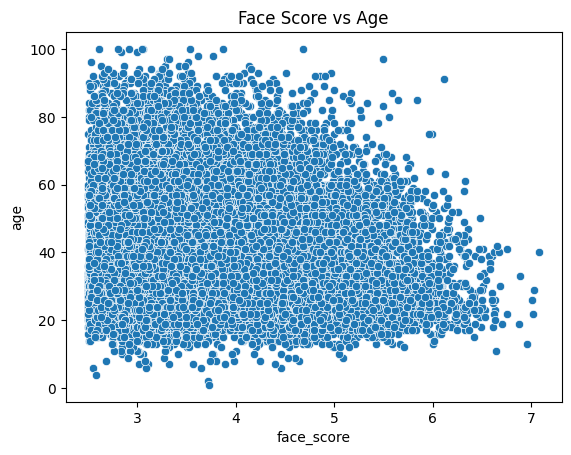

In [30]:
sns.scatterplot(x='face_score', y='age', data=filtered_data)
plt.title('Face Score vs Age')
plt.show()


In [31]:
filtered_data = filtered_data[['path', 'dob', 'age']]

In [32]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27672 entries, 0 to 62327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   path    27672 non-null  object 
 1   dob     27672 non-null  int32  
 2   age     27672 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 756.7+ KB


In [33]:
filtered_data.head()


,path,dob,age
0,17/10000217_1981-05-05_2009.jpg,723671,28.0
2,12/100012_1948-07-03_2008.jpg,711677,60.0
4,16/10002116_1971-05-31_2012.jpg,720044,41.0
5,02/10002702_1960-11-09_2012.jpg,716189,52.0
6,41/10003541_1937-09-27_1971.jpg,707745,34.0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
filtered_data = filtered_data.drop(columns=['dob'])


In [36]:
from sklearn.model_selection import train_test_split

# Split the data
train_data, val_data = train_test_split(
    filtered_data, 
    test_size=0.2,         
    random_state=100,       
    shuffle=True          
)


print(f"Training Set Size: {train_data.shape}")
print(f"Validation Set Size: {val_data.shape}")


Training Set Size: (22137, 2)
Validation Set Size: (5535, 2)


In [37]:
IMG_SIZE=(128,128)
def load_and_preprocess(img_path):
    img=tf.keras.utils.load_img('C:/Users/91812/downloads/wiki/'+img_path,target_size=IMG_SIZE)
    img=tf.keras.utils.img_to_array(img)
    img=img/255.0
    return img

In [38]:
X_train = np.array([load_and_preprocess(path) for path in train_data['path']])
y_train = train_data['age'].values

X_val = np.array([load_and_preprocess(path) for path in val_data['path']])
y_val = val_data['age'].values

c:\Users\91812\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [39]:
X_train.shape

(22137, 128, 128, 3)

In [40]:
y_train.shape

(22137,)

In [41]:
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [43]:
model= Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1) ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])





c:\Users\91812\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 528s 752ms/step - loss: 330.1755 - mae: 13.9804 - val_loss: 204.5754 - val_mae: 11.2036
Epoch 2/10
 85/692 ━━━━━━━━━━━━━━━━━━━━ 7:57 787ms/step - loss: 238.3331 - mae: 11.9966

In [ ]:
model.evaluate(X_val, y_val)

173/173 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - loss: 207.7545 - mae: 11.1317


[211.1868133544922, 11.251933097839355]

In [46]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)  # Get model predictions
r2 = r2_score(y_val, y_pred)   # Compute R² score
print("R² Score:", r2)


173/173 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step
R² Score: 0.1918629561009233


In [47]:
model.save("wiki_age_prediction_model.h5")


In [44]:
from tensorflow.keras.applications import MobileNetV2

In [45]:
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights="imagenet")
base_model.trainable = False  


model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1)  
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error',
              metrics=['mae'])


In [50]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 530s 724ms/step - loss: 244.5914 - mae: 11.8453 - val_loss: 156.2110 - val_mae: 9.5600
Epoch 2/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 469s 678ms/step - loss: 154.8872 - mae: 9.5256 - val_loss: 146.8140 - val_mae: 9.2348
Epoch 3/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 430s 621ms/step - loss: 136.5457 - mae: 8.9579 - val_loss: 148.9366 - val_mae: 9.4390
Epoch 4/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 415s 599ms/step - loss: 131.1768 - mae: 8.7905 - val_loss: 151.0266 - val_mae: 9.2726
Epoch 5/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 412s 595ms/step - loss: 119.3514 - mae: 8.3667 - val_loss: 147.4928 - val_mae: 9.2212
Epoch 6/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 402s 580ms/step - loss: 107.8332 - mae: 8.0020 - val_loss: 150.2314 - val_mae: 9.2400
Epoch 7/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 446s 644ms/step - loss: 102.8601 - mae: 7.8183 - val_loss: 148.9350 - val_mae: 9.2468
Epoch 8/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 472s 681ms/step - loss: 96.6120 - mae: 7.5633 - val_loss: 148.8243 - val_mae:

In [51]:
y_pred=model.predict(X_val)
r_score=r2_score(y_val,y_pred)
print(r_score)

173/173 ━━━━━━━━━━━━━━━━━━━━ 92s 493ms/step
0.41373446556052473


In [52]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)
print("MAE:", mae)


MAE: 9.352293395651497


In [53]:
model.save("wiki_age_prediction_model_1.h5")


In [46]:
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights="imagenet")

In [47]:
for layer in base_model.layers[-50:]:  
    layer.trainable = True


In [50]:
model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Regression output
])

In [49]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=Huber(delta=1.0),
              metrics=['mae'])

In [54]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1764s 2s/step - loss: 18.5475 - mae: 19.0402 - val_loss: 9.6767 - val_mae: 10.1644
Epoch 2/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1522s 2s/step - loss: 8.7650 - mae: 9.2528 - val_loss: 7.9680 - val_mae: 8.4536
Epoch 3/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1653s 2s/step - loss: 8.2194 - mae: 8.7055 - val_loss: 7.9569 - val_mae: 8.4422
Epoch 4/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1716s 2s/step - loss: 7.6378 - mae: 8.1236 - val_loss: 10.1388 - val_mae: 10.6285
Epoch 5/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1474s 2s/step - loss: 7.1726 - mae: 7.6567 - val_loss: 7.7315 - val_mae: 8.2158
Epoch 6/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1448s 2s/step - loss: 6.9409 - mae: 7.4253 - val_loss: 7.6400 - val_mae: 8.1261
Epoch 7/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1479s 2s/step - loss: 6.5650 - mae: 7.0483 - val_loss: 7.9015 - val_mae: 8.3857
Epoch 8/10
692/692 ━━━━━━━━━━━━━━━━━━━━ 1461s 2s/step - loss: 6.2808 - mae: 6.7641 - val_loss: 7.9593 - val_mae: 8.4430
Epoch 9/10
692/692 ━━━━━━━━━━━━━━━━

In [55]:
y_pred=model.predict(X_val)


173/173 ━━━━━━━━━━━━━━━━━━━━ 95s 515ms/step


In [56]:
from sklearn.metrics import r2_score
r_score=r2_score(y_val,y_pred)
print(r_score)

0.5796777209583742


In [57]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)
print("MAE:", mae)

MAE: 7.886004635570495


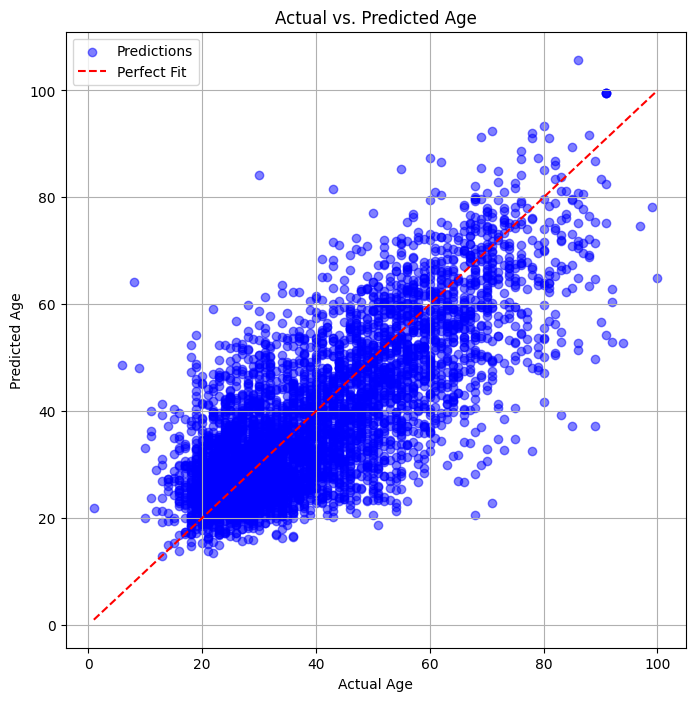

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for actual vs. predicted ages
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs. Predicted Age")
plt.legend()
plt.grid(True)
plt.show()


In [59]:
model.save("wiki_age_prediction_model_2.h5")

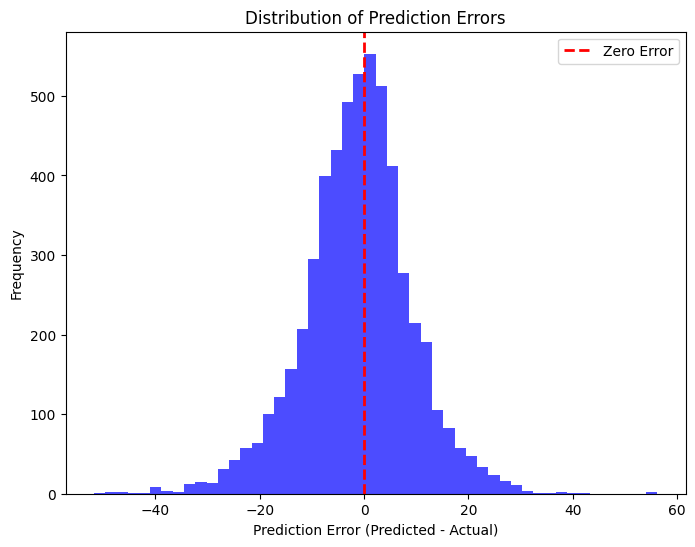

In [61]:
import matplotlib.pyplot as plt
import numpy as np

errors = np.array(y_pred).flatten() - np.array(y_val).flatten()

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2, label="Zero Error")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.legend()
plt.show()


C:\Users\91812\AppData\Local\Temp\ipykernel_10140\129272954.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mae = df.groupby('Age Group')['Absolute Error'].mean()


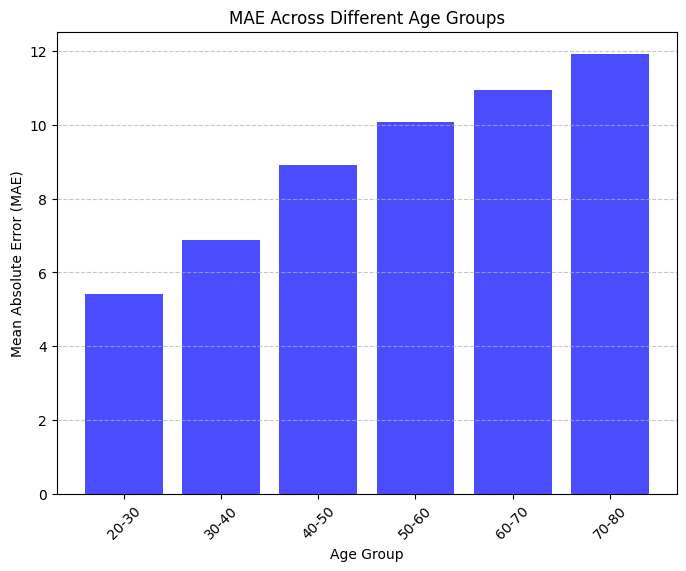

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


y_pred = np.array(y_pred).flatten()
y_val = np.array(y_val).flatten()


age_bins = list(range(20, 90, 10))  
age_labels = [f"{i}-{i+10}" for i in age_bins[:-1]]  


df = pd.DataFrame({'Actual Age': y_val, 'Predicted Age': y_pred})
df['Absolute Error'] = np.abs(df['Predicted Age'] - df['Actual Age'])

df['Age Group'] = pd.cut(df['Actual Age'], bins=age_bins, labels=age_labels, right=False)


age_group_mae = df.groupby('Age Group')['Absolute Error'].mean()


plt.figure(figsize=(8, 6))
plt.bar(age_group_mae.index, age_group_mae.values, color='blue', alpha=0.7)
plt.xlabel("Age Group")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Across Different Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [63]:
import cv2
import numpy as np
import tensorflow as tf

model_path = "C:/Users/91812/Downloads/campuspro/tensorflow/wiki_model/wiki_age_prediction_model_2.h5"  # Change this to your actual model path
model = tf.keras.models.load_model(model_path)

IMAGE_SIZE = 128  








In [64]:
def preprocess_image(image_path):
   
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error: Could not read image at {image_path}. Check the path.")

 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
    img = cv2.resize(img, (128, 128))

    
    img = img / 255.0  

    
    img = np.expand_dims(img, axis=0)

    return img

In [65]:
def predict_age(image_path):
    """
    Predicts the age for a given image path.
    """
   
    img = preprocess_image(image_path)

    
    predicted_age = model.predict(img)[0][0]  

    return round(predicted_age, 2)

In [66]:

image_path = "C:/Users/91812/Downloads/resume photo.jpg"  
predicted_age = predict_age(image_path)
print(f"Predicted Age: {predicted_age}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Age: 19.040000915527344


In [67]:

image_path = "C:/Users/91812/Downloads/purn_image.jpg"  
predicted_age = predict_age(image_path)
print(f"Predicted Age: {predicted_age}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted Age: 25.450000762939453


In [68]:
image_path = "C:/Users/91812/Downloads/archive (3)/UTKFace/53_0_0_20170111202035978.jpg.chip.jpg"  
predicted_age = predict_age(image_path)
print(f"Predicted Age: {predicted_age}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predicted Age: 53.7400016784668


In [69]:
image_path = "C:/Users/91812/Downloads/archive (3)/UTKFace/1_0_0_20161219154018476.jpg.chip.jpg"  
predicted_age = predict_age(image_path)
print(f"Predicted Age: {predicted_age}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted Age: 39.43000030517578
